In [155]:
# Importing Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings ('ignore')

In [251]:
df = pd.read_csv ('alzheimers_disease_data.csv')
df.head ().T

,0,1,2,3,4
PatientID,4751,4752,4753,4754,4755
Age,73,89,73,74,89
Gender,0,0,0,1,0
Ethnicity,0,0,3,0,0
EducationLevel,2,0,1,1,0
BMI,22.927749,26.827681,17.795882,33.800817,20.716974
Smoking,0,0,0,1,0
AlcoholConsumption,13.297218,4.542524,19.555085,12.209266,18.454356
PhysicalActivity,6.327112,7.619885,7.844988,8.428001,6.310461
DietQuality,1.347214,0.518767,1.826335,7.435604,0.795498


In [157]:
df.shape

(2149, 35)

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [159]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,2149.0,5825.000000,620.507185,4751.000000,5288.000000,5825.000000,6362.000000,6899.000000
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346


In [160]:
df.duplicated().sum()

0

In [161]:
df.isnull().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [162]:
# Identify numerical columns: columns with more than 10 unique values are considered numerical
numerical_columns = [col for col in df.columns if df[col].nunique() > 10]

# Identify categorical columns: columns that are not numerical and not 'Diagnosis'
categorical_columns = df.columns.difference(numerical_columns).difference(['Diagnosis']).to_list()

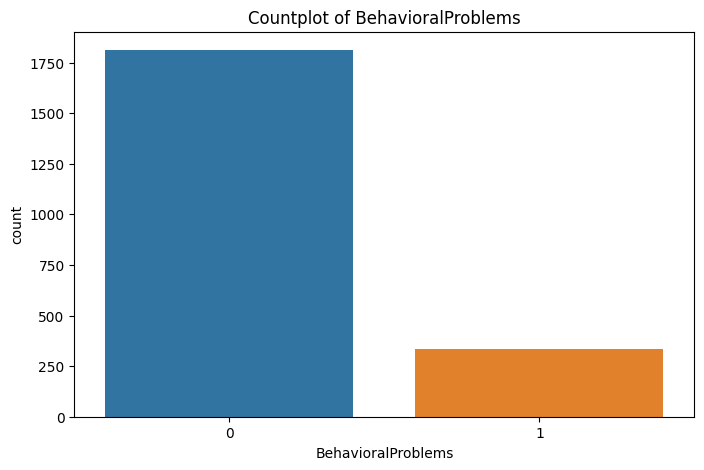

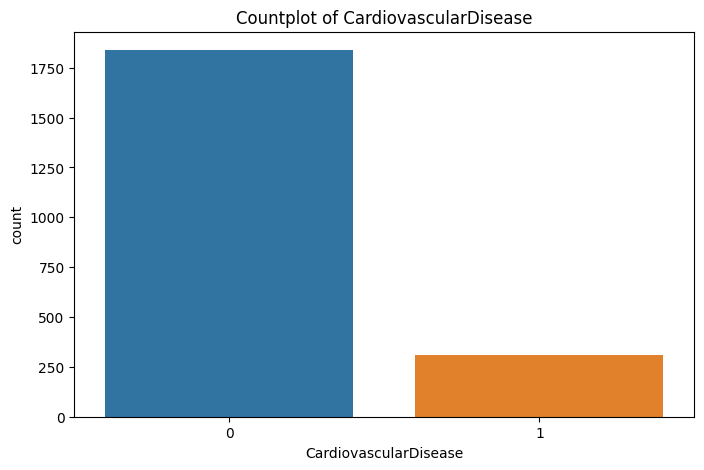

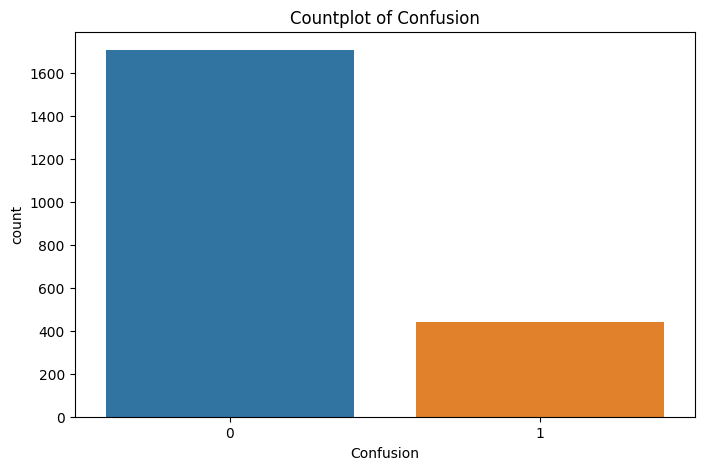

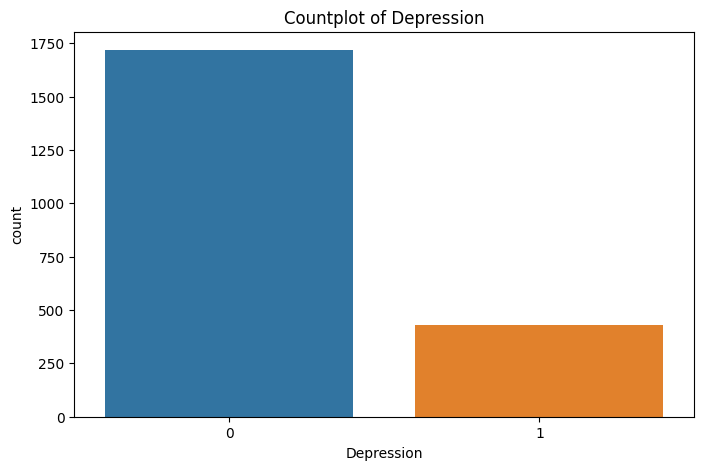

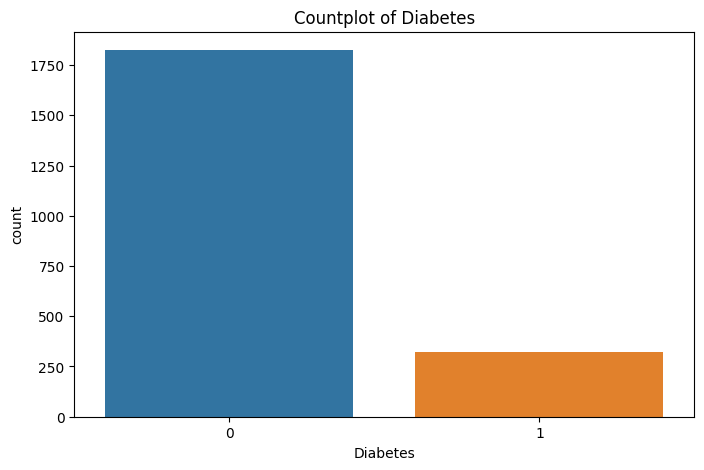

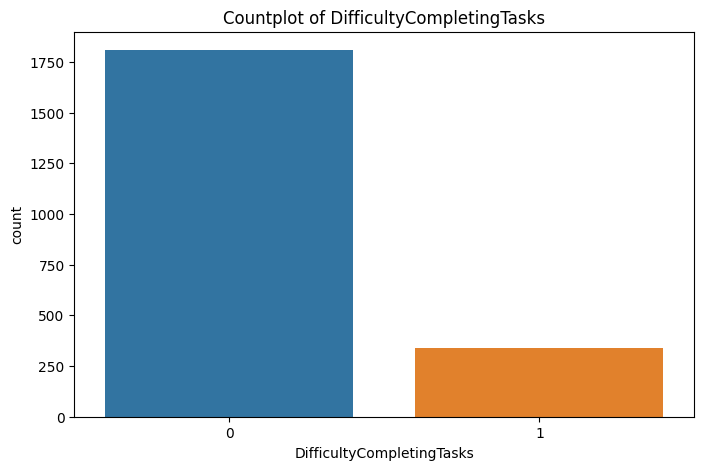

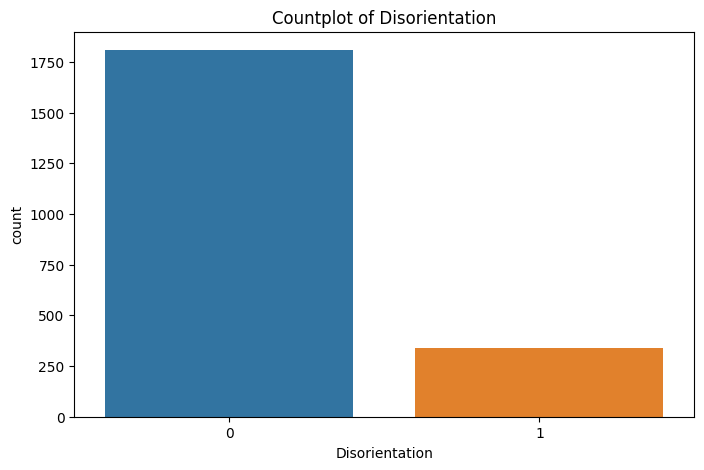

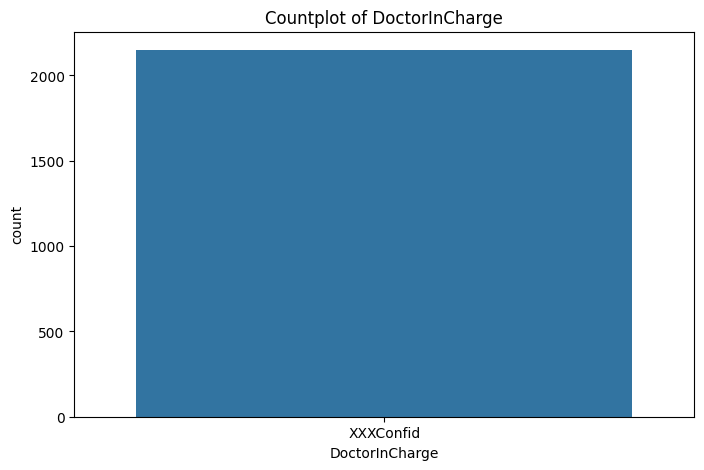

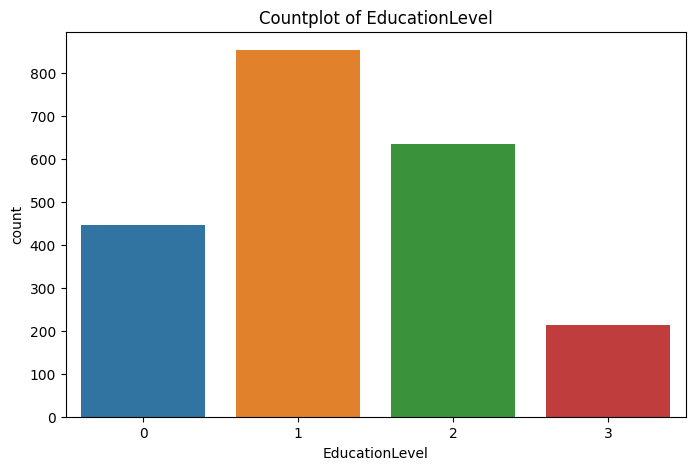

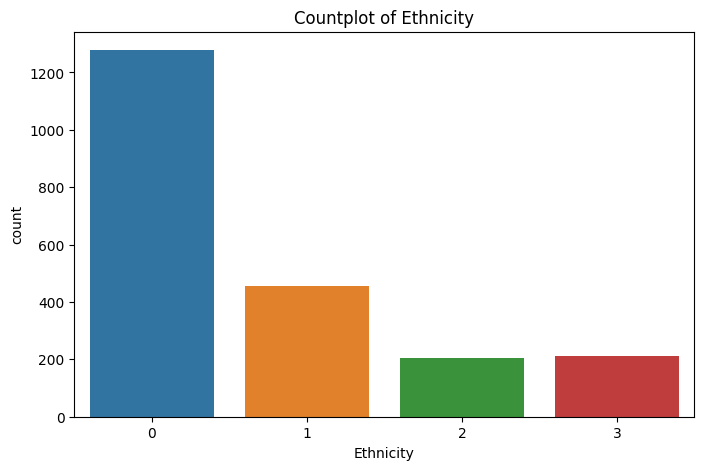

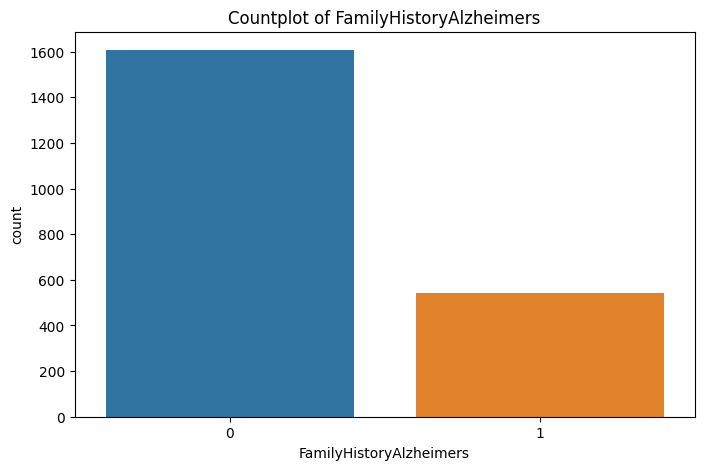

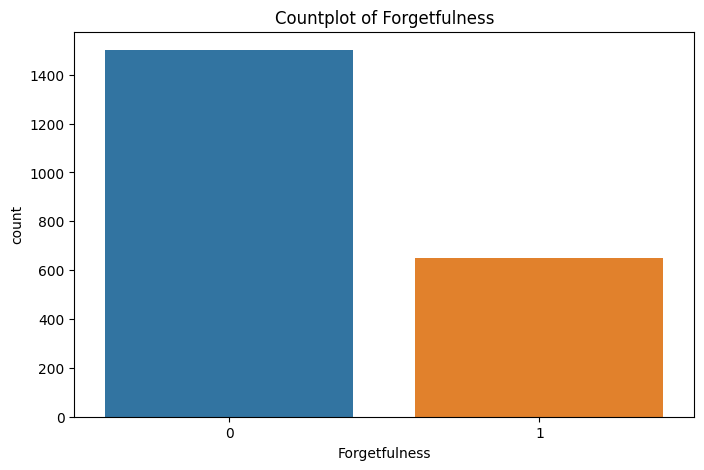

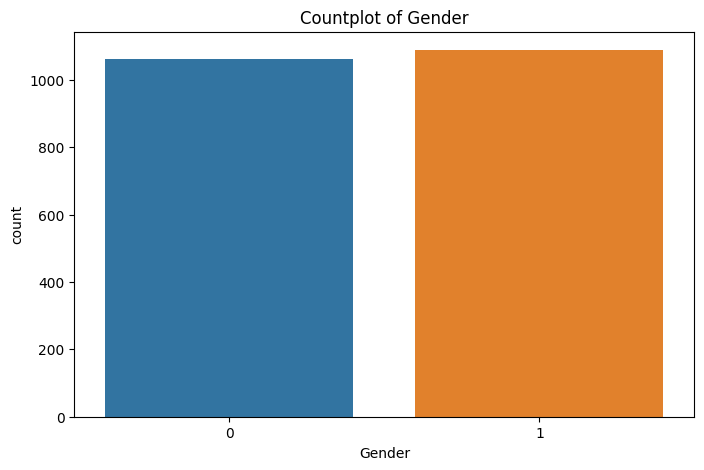

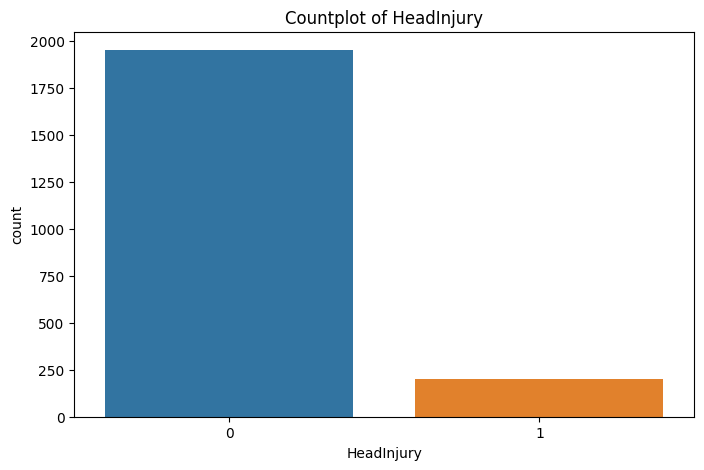

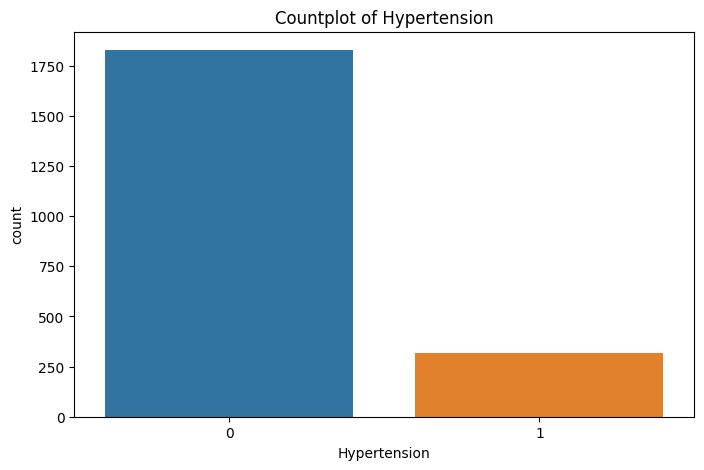

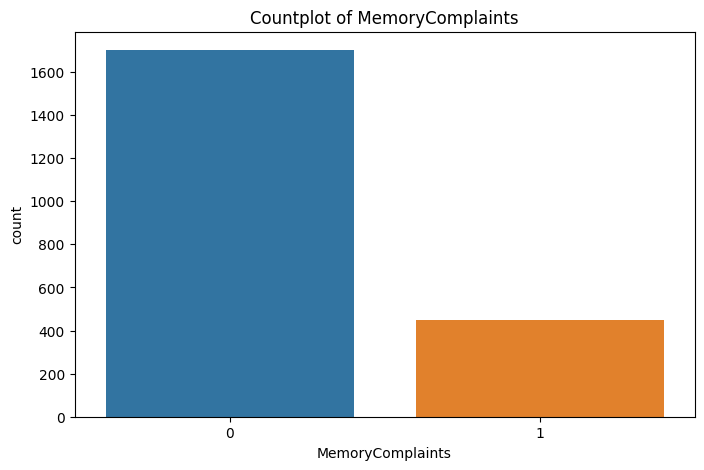

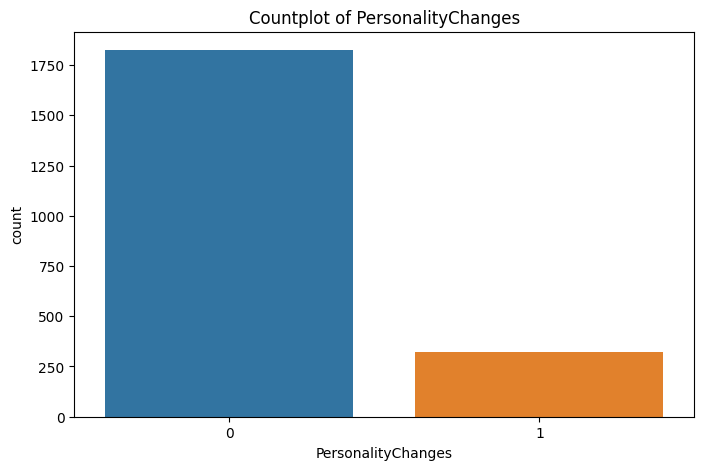

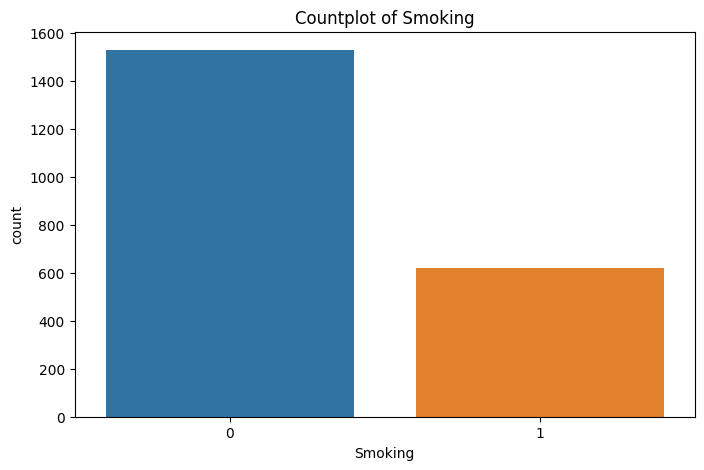

In [163]:
# Custom labels for the categorical columns
custom_labels = {
    'Gender': ['Male', 'Female'],
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'EducationLevel': ['None', 'High School', 'Bachelor\'s', 'Higher'],
    'Smoking': ['No', 'Yes'],
    'FamilyHistoryAlzheimers': ['No', 'Yes'],
    'CardiovascularDisease': ['No', 'Yes'],
    'Diabetes': ['No', 'Yes'],
    'Depression': ['No', 'Yes'],
    'HeadInjury': ['No', 'Yes'],
    'Hypertension': ['No', 'Yes'],
    'MemoryComplaints': ['No', 'Yes'],
    'BehavioralProblems': ['No', 'Yes'],
    'Confusion': ['No', 'Yes'],
    'Disorientation': ['No', 'Yes'],
    'PersonalityChanges': ['No', 'Yes'],
    'DifficultyCompletingTasks': ['No', 'Yes'],
    'Forgetfulness': ['No', 'Yes']
}

# Plot countplots for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column)
    plt.title(f'Countplot of {column}')
    
    # # Directly set custom labels
    # labels = custom_labels[column]
    # ticks = range(len(labels))
    # plt.xticks(ticks=ticks, labels=labels)
    
    plt.show()

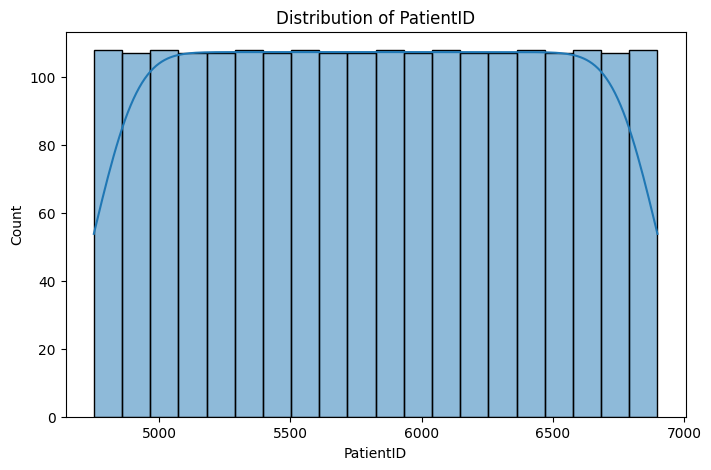

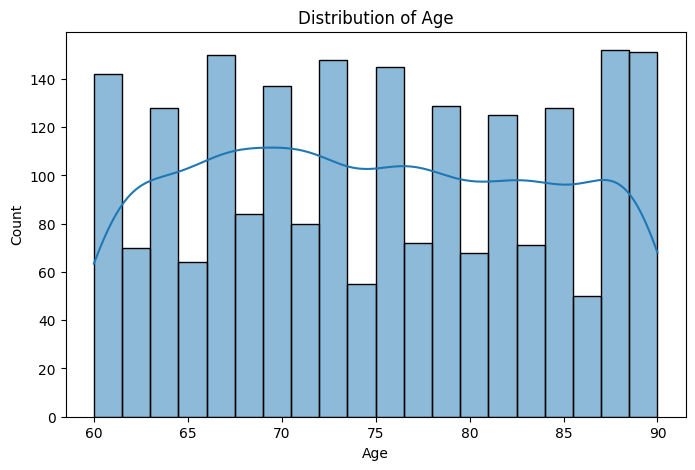

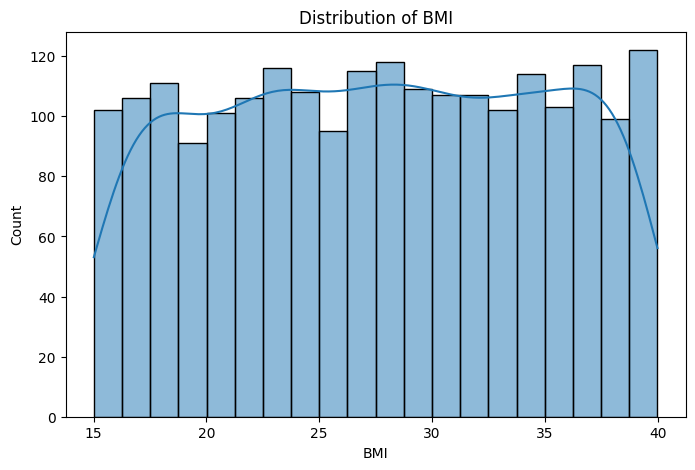

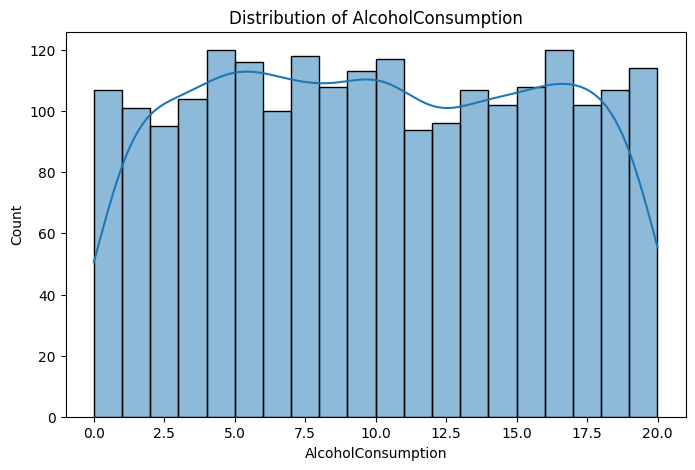

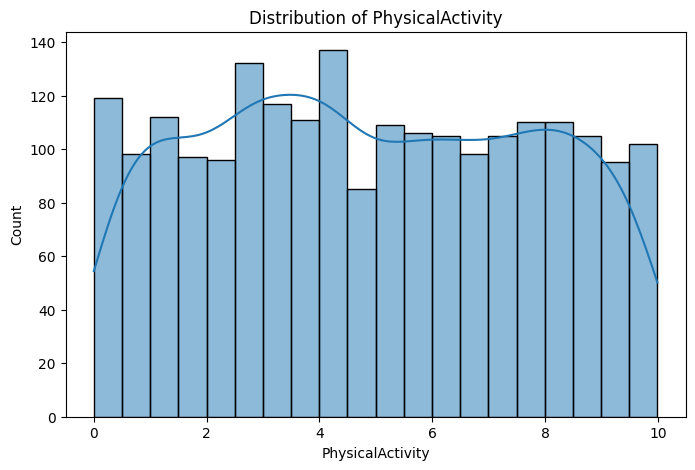

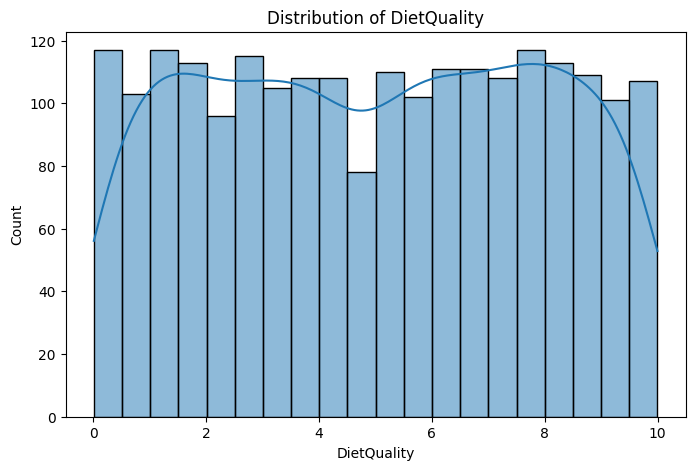

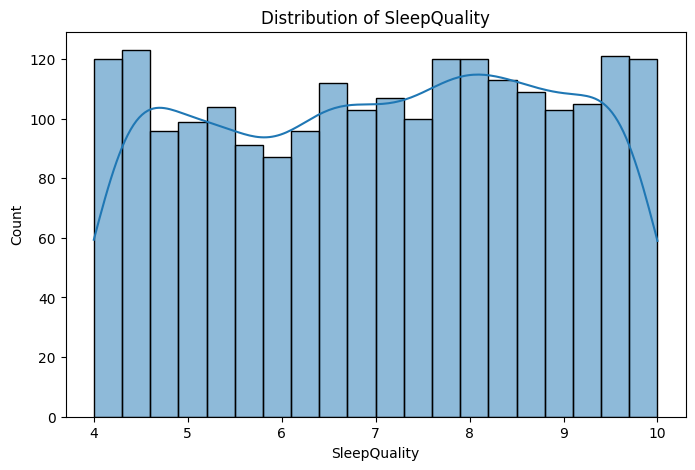

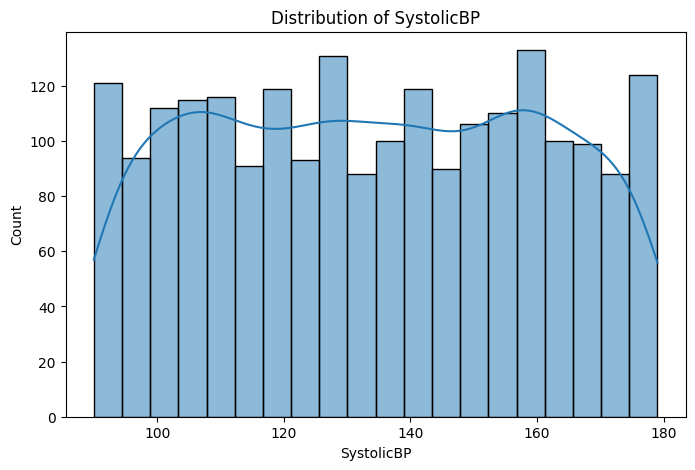

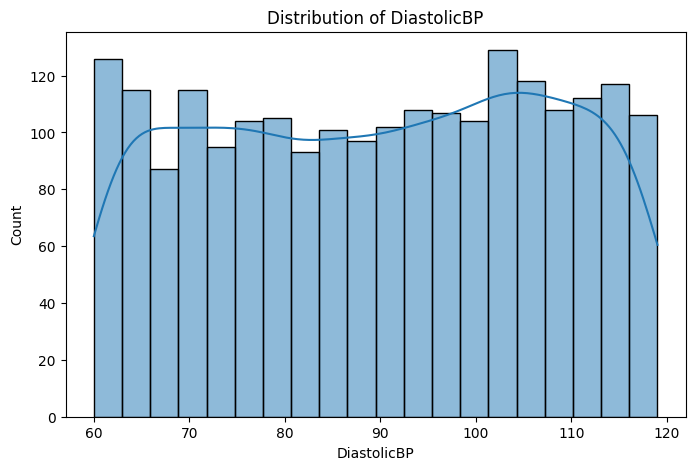

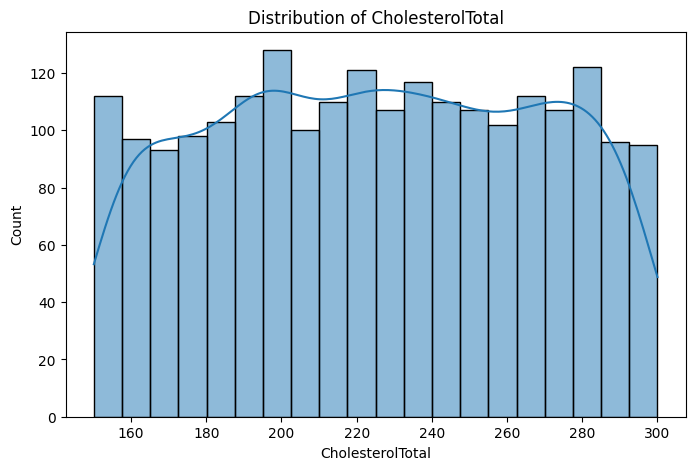

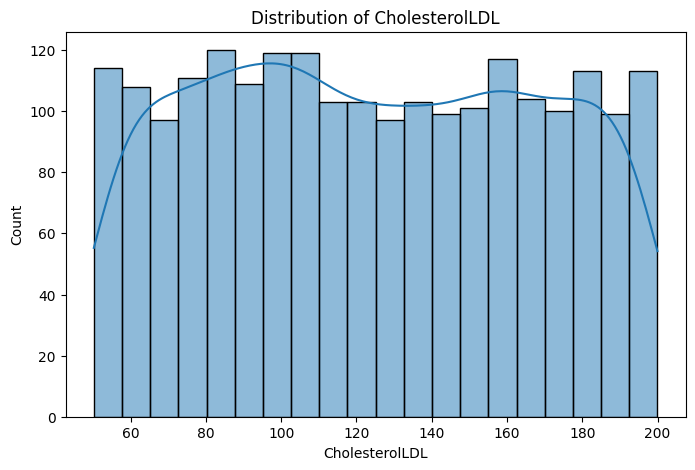

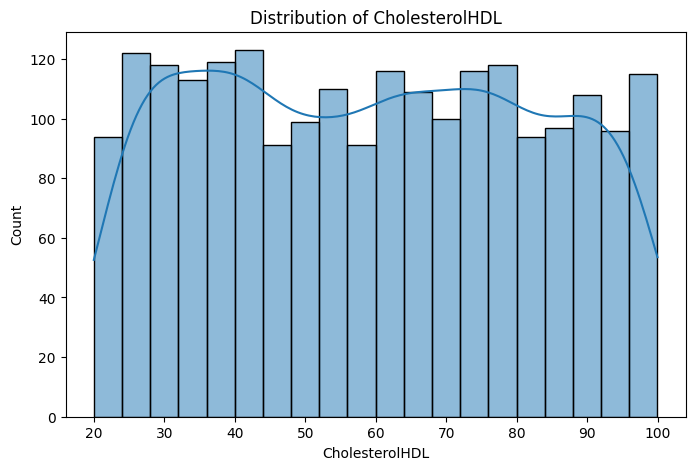

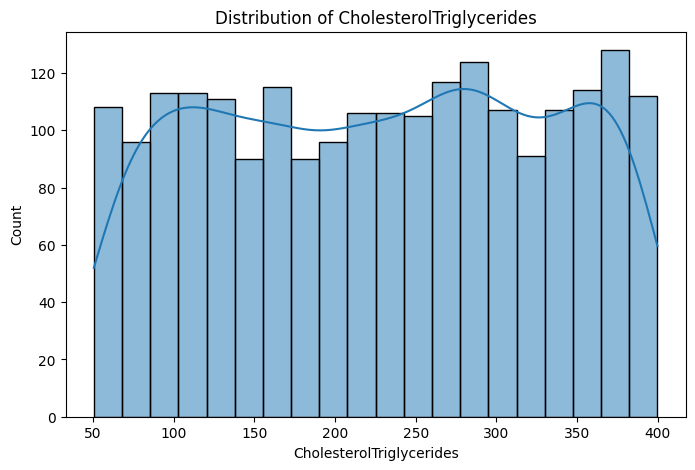

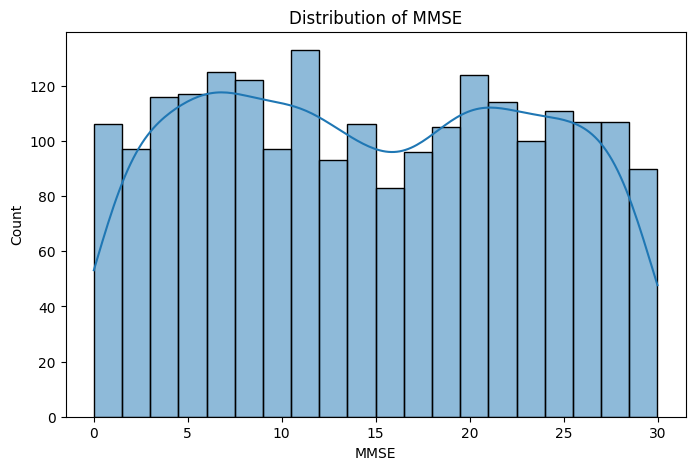

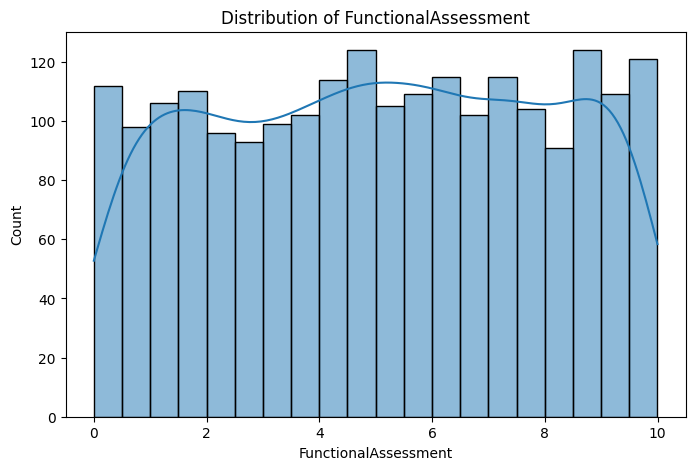

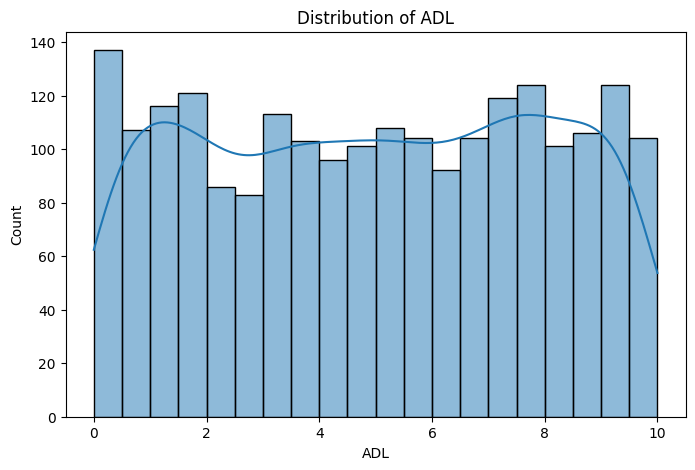

In [164]:
# Plot histogram for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=column, kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    plt.show()

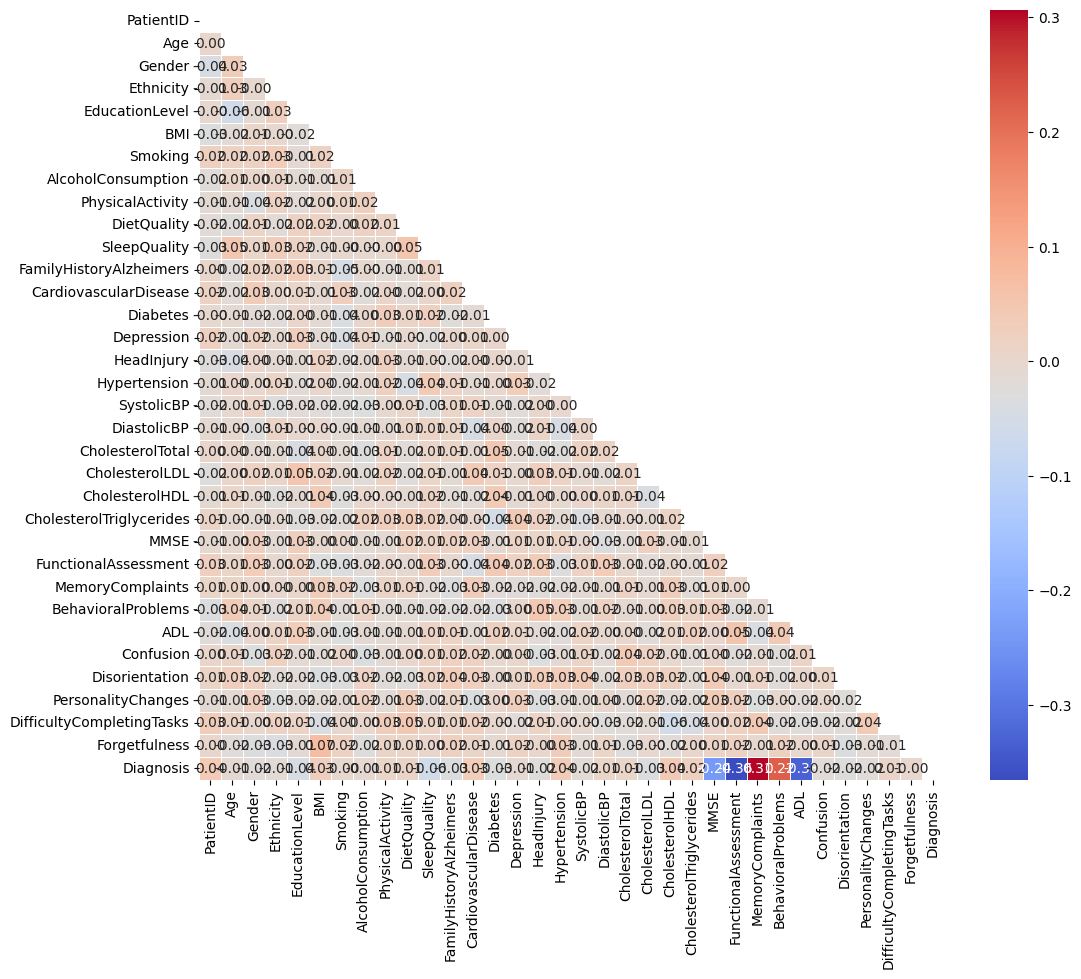

In [246]:
# Exclude non-numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix on numeric data
corr_matrix = numeric_df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt='.2f', linewidths=.5)
plt.show()


The heatmap reveals that the features do not have any strong correlations among themselves. However, there are five columns that show a correlation with the target variable.

Let's calculate Pearson correlation coefficient, also known as Pearson's r. It is a measure of the linear relationship between two variables. It quantifies the degree to which a pair of variables are linearly related, ranging from -1 to 1.

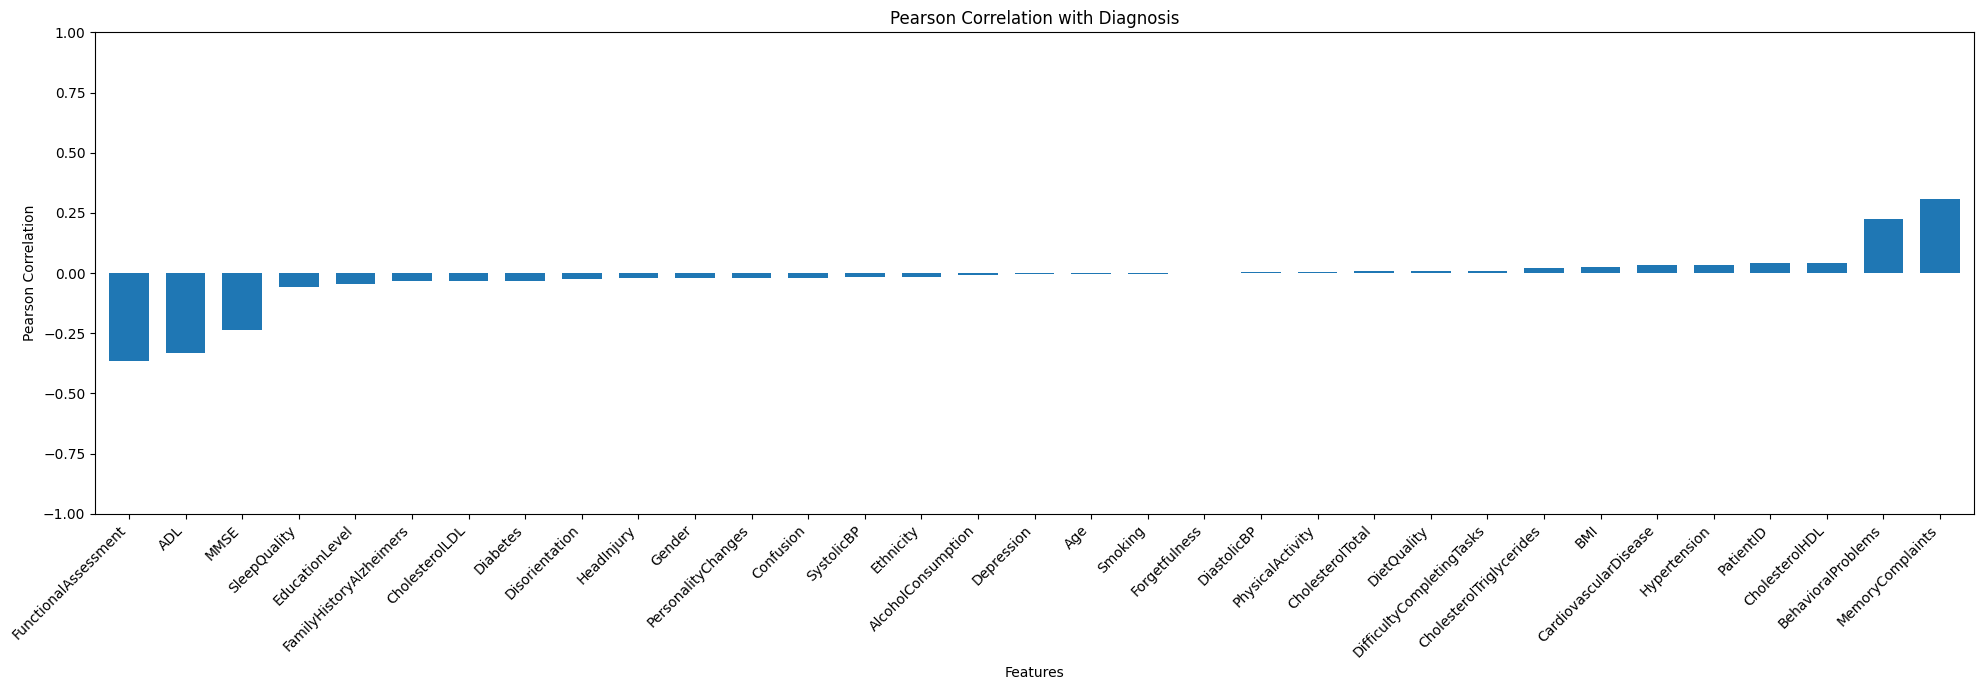

In [167]:
# Compute Pearson correlation coefficients
correlations = df.corr(numeric_only=True)['Diagnosis'][:-1].sort_values()

# Set the size of the figure
plt.figure(figsize=(20, 7))

# Create a bar plot of the Pearson correlation coefficients
ax = correlations.plot(kind='bar', width=0.7)

# Set the y-axis limits and labels
ax.set(ylim=[-1, 1], ylabel='Pearson Correlation', xlabel='Features', 
       title='Pearson Correlation with Diagnosis')

# Rotate x-axis labels for better readability
ax.set_xticklabels(correlations.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

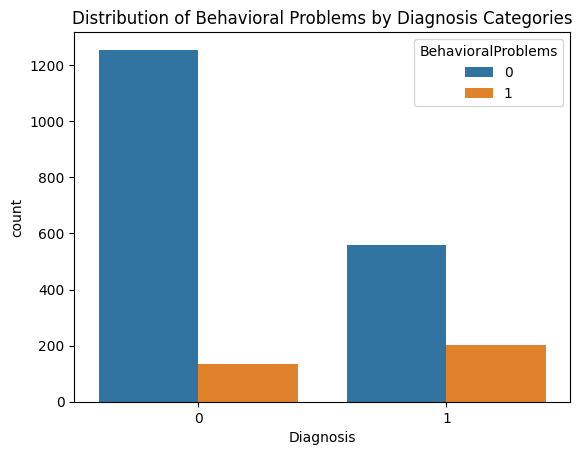

In [171]:
sns.countplot(data=df, x='Diagnosis', hue='BehavioralProblems')
plt.title(f'Distribution of Behavioral Problems by Diagnosis Categories')
plt.show()

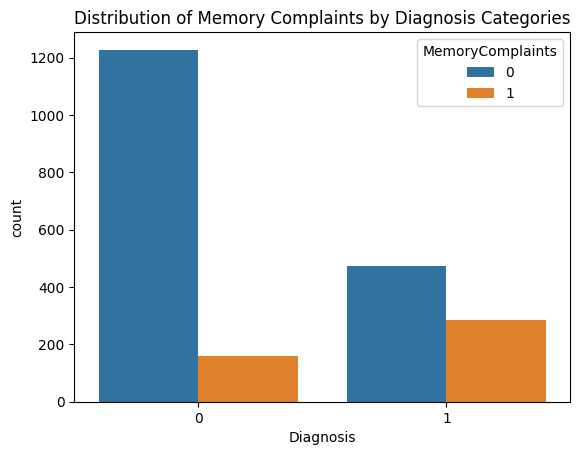

In [172]:
sns.countplot(data=df, x='Diagnosis', hue='MemoryComplaints')
plt.title(f'Distribution of Memory Complaints by Diagnosis Categories')
plt.show()

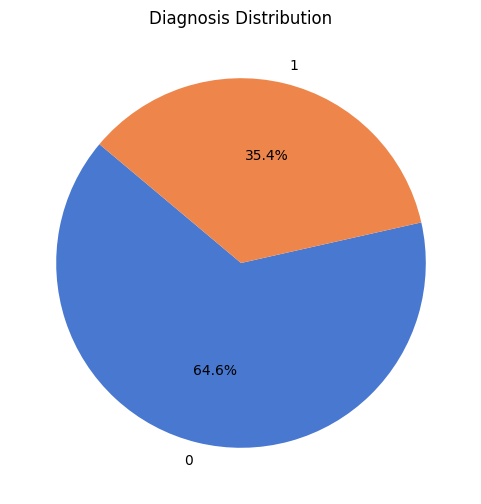

In [173]:
# Define the Response categories and count occurences
categories = [0, 1]
counts = df.Diagnosis.value_counts().tolist()

# Choose a color palette from Seaborn for the pie chart
colors = sns.color_palette("muted")

# Plot the pie chart with the counts of each response category
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Diagnosis Distribution')
plt.show()

## DATA PREPROCESSING

In [175]:
#unique values in each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()

Unique values in column 'PatientID':
[4751 4752 4753 ... 6897 6898 6899]

Unique values in column 'Age':
[73 89 74 86 68 75 72 87 78 84 64 69 63 65 82 77 71 83 79 67 66 70 85 60
 88 62 81 61 80 90 76]

Unique values in column 'Gender':
[0 1]

Unique values in column 'Ethnicity':
[0 3 1 2]

Unique values in column 'EducationLevel':
[2 0 1 3]

Unique values in column 'BMI':
[22.92774923 26.82768119 17.79588244 ... 15.47647896 15.29991122
 33.28973831]

Unique values in column 'Smoking':
[0 1]

Unique values in column 'AlcoholConsumption':
[13.29721773  4.54252382 19.55508453 ...  4.59467018  8.67450518
  7.89070315]

Unique values in column 'PhysicalActivity':
[6.32711247 7.61988454 7.84498779 ... 9.88600229 6.35428175 6.57099338]

Unique values in column 'DietQuality':
[1.34721431 0.51876714 1.82633466 ... 8.12002455 1.26342749 7.94140388]

Unique values in column 'SleepQuality':
[9.02567867 7.15129274 9.67357416 ... 5.76946355 8.32287396 9.87871052]

Unique values in column 'FamilyHist

In [176]:
columns = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']

#normalize the columns
min_max_scaler = MinMaxScaler()
df[columns] = min_max_scaler.fit_transform(df[columns])

#standardize the columns
standard_scaler = StandardScaler()
df[columns] = standard_scaler.fit_transform(df[columns])

In [177]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

## MODELLING

## Suggested Features to Keep
Based on common knowledge and practices in medical prediction tasks, the following features are likely to be more relevant:

- Age: Age is a significant risk factor for Alzheimer's disease.
- BMI: Body Mass Index can be related to various health conditions, including Alzheimer's.
- Education Level: Lower education levels have been associated with a higher risk of Alzheimer's.
- Diabetes: Diabetes has been linked to an increased risk of developing Alzheimer's.
- Depression: Depression can be a risk factor for cognitive decline.
- MMSE: The Mini-Mental State Examination score is a direct measure of cognitive function.
- Family History of Alzheimer’s: Having a family history can be a significant risk factor.
- Cholesterol Total: Elevated cholesterol levels may be related to Alzheimer's risk.

## Features to Consider Dropping
- Gender: While gender can be relevant, its impact may be less significant compared to other features. However, this depends on your specific dataset.
- Ethnicity: This can be less predictive compared to other features.
- Smoking: While smoking can impact health, its direct relationship with Alzheimer's is less clear compared to other factors.
- Alcohol Consumption: This may not be as directly linked to Alzheimer's as other features.
- Physical Activity: While important for overall health, its direct impact on Alzheimer's risk may be less clear.
- Diet Quality: Similar to physical activity, diet quality is important but may be less directly predictive.
- Sleep Quality: While it impacts overall health, its direct relationship with Alzheimer's may be less clear.
- Cardiovascular Disease: This could be less directly related than diabetes or cholesterol levels.

In [ ]:
#split data into features and target
X = df.drop(columns = ['PatientID', 'DoctorInCharge','Diagnosis'])
y = df['Diagnosis']

#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True)

In [218]:
#define hyperparameter grids for each model
param_grids = {
    'Decision Tree': {'max_depth': [3, 5, 7, 12, None]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7, 12, None]},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7]},
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'scale', 'auto']},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 5, 7]},
    'CatBoost': {'iterations': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}
}

In [220]:
#instantiate classification models with default parameters
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0)
}

In [222]:
#fit models using GridSearchCV for hyperparameter tuning
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv = 5, scoring = 'f1')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(f'{name} Classification Report:\n{report}\nBest Parameters: {grid_search.best_params_}\n')

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       277
           1       0.94      0.87      0.90       153

    accuracy                           0.93       430
   macro avg       0.93      0.92      0.93       430
weighted avg       0.93      0.93      0.93       430

Best Parameters: {'max_depth': 5}

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       277
           1       0.96      0.82      0.89       153

    accuracy                           0.93       430
   macro avg       0.94      0.90      0.92       430
weighted avg       0.93      0.93      0.92       430

Best Parameters: {'max_depth': None, 'n_estimators': 200}

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.87      0.80       277
           1       0.66   

In [224]:
model = CatBoostClassifier (iterations = 100, learning_rate = 0.01)

In [230]:
model.fit(X, y)

0:	learn: 0.6802816	total: 6.25ms	remaining: 618ms
1:	learn: 0.6668821	total: 11.2ms	remaining: 549ms
2:	learn: 0.6549084	total: 16ms	remaining: 517ms
3:	learn: 0.6436427	total: 20.8ms	remaining: 499ms
4:	learn: 0.6320655	total: 25.6ms	remaining: 487ms
5:	learn: 0.6205058	total: 30.5ms	remaining: 477ms
6:	learn: 0.6085256	total: 35.1ms	remaining: 467ms
7:	learn: 0.5978652	total: 39.7ms	remaining: 457ms
8:	learn: 0.5866200	total: 44.4ms	remaining: 449ms
9:	learn: 0.5758222	total: 49.2ms	remaining: 443ms
10:	learn: 0.5657884	total: 53.9ms	remaining: 436ms
11:	learn: 0.5555800	total: 58.7ms	remaining: 430ms
12:	learn: 0.5456323	total: 63.9ms	remaining: 428ms
13:	learn: 0.5363787	total: 68.6ms	remaining: 421ms
14:	learn: 0.5269673	total: 73.3ms	remaining: 416ms
15:	learn: 0.5190164	total: 78ms	remaining: 409ms
16:	learn: 0.5106537	total: 82.5ms	remaining: 403ms
17:	learn: 0.5022331	total: 87.7ms	remaining: 399ms
18:	learn: 0.4938606	total: 92.2ms	remaining: 393ms
19:	learn: 0.4855401	total

In [238]:
import pickle

In [240]:
filename = 'Alzheimer.sav'
pickle.dump(model, open (filename, 'wb'))